# 🎓 Student Performance Analysis

## 📌 Objective
The goal of this project is to analyze students’ performance in math, reading, and writing exams, and discover how different factors such as gender, parental education, lunch type, and test preparation impact their scores.

---

## 📂 Dataset Information

- **Source**: [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)
- **Columns**:
  - `gender`
  - `race/ethnicity`
  - `parental level of education`
  - `lunch`
  - `test preparation course`
  - `math score`
  - `reading score`
  - `writing score`

---

## 🔍 Analysis Plan

### 1. Data Exploration
- View dataset shape and structure
- Check for missing values
- Understand column types

### 2. Distribution of Exam Scores
- Explore distribution of math, reading, and writing scores
- Identify any outliers

### 3. Gender-Based Analysis
- Compare average scores of male vs. female students
- Visualize the distribution of scores by gender

### 4. Impact of Test Preparation Course
- Analyze how test preparation affects performance
- Use bar graphs to compare scores

### 5. Parental Education Level
- Examine the relationship between parental education and student performance
- See which group performs best on average

### 6. Lunch Type
- Compare exam scores based on lunch type (standard vs. free/reduced)

### 7. Score Correlation
- Find relationships between math, reading, and writing scores
- Use a correlation matrix 
### 8. Top Performers
- Calculate average score per student
- Identify top 5 performing students

---

## 📈 Key Findings

- Students who completed the test preparation course generally scored higher.
- Female students performed better in reading and writing, while males slightly outperformed in math.
- Students with parents holding higher education degrees tended to perform better.
- Those receiving standard lunch showed better average scores.

---

## ✅ Conclusion

This project demonstrated how simple analysis and visualization techniques can help uncover meaningful insights from student data. It also highlighted the impact of social and academic support systems on academic performance.

---

## 📎 Future Work

- Apply machine learning to predict student performance.
- Analyze performance by race/ethnicity more deeply.
- Add more datasets (e.g., attendance, behavior) for broader analysis.


## Reading the Dataset using Pandas :

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Students_Performance.csv')

## Data Exploration : EDA(Exploratory Data Analysis)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [42]:
df.shape

(1000, 8)

In [44]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Analyze score distibutions :

In [54]:
math_scores = np.array(df['math score'])
reading_scores = np.array(df['reading score'])
writing_scores = np.array(df['writing score'])

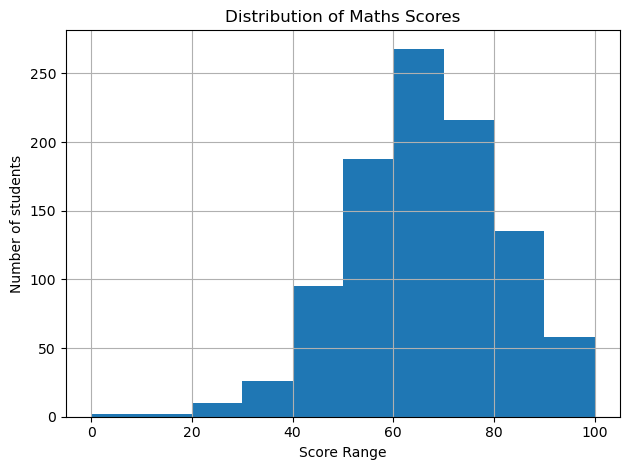

In [74]:
plt.hist(math_scores)
plt.xlabel('Score Range')
plt.ylabel('Number of students')
plt.title('Distribution of Maths Scores') 
plt.tight_layout()
plt.grid()
plt.show()

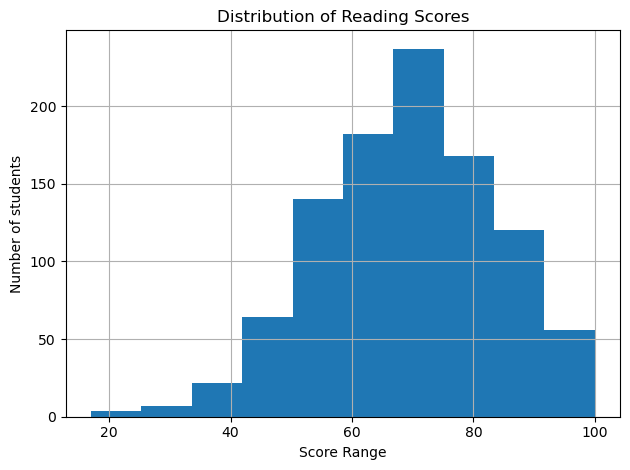

In [72]:
plt.hist(reading_scores)
plt.xlabel('Score Range')
plt.ylabel('Number of students')
plt.title('Distribution of Reading Scores') 
plt.tight_layout()
plt.grid()
plt.show()

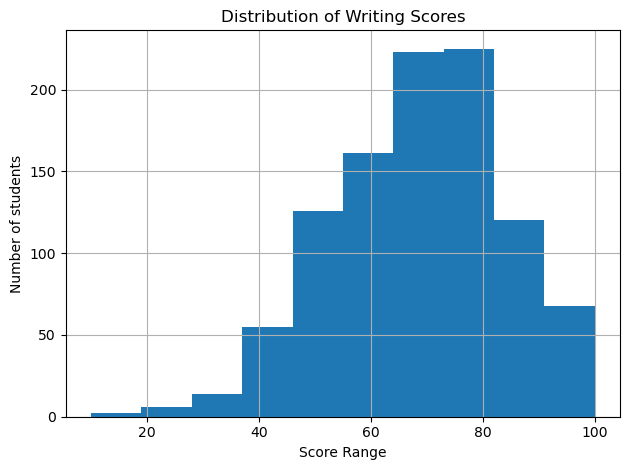

In [70]:
plt.hist(writing_scores)
plt.xlabel('Score Range')
plt.ylabel('Number of students')
plt.title('Distribution of Writing Scores') 
plt.tight_layout()
plt.grid()
plt.show()

## Gender-Based Analysis

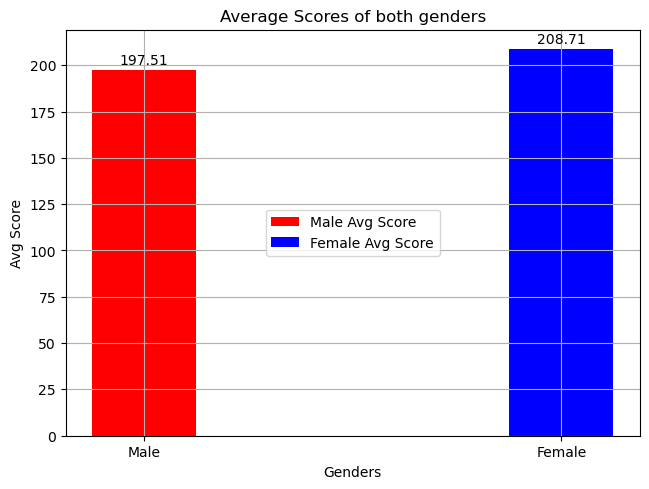

In [12]:
df['Total Scores']=df.loc[: ,['math score','reading score','writing score']].sum(axis=1)
avg_marks = df.groupby('gender')['Total Scores'].mean()
male_avg= round(avg_marks['male'],2)
female_avg= round(avg_marks['female'],2)

# Visualization :
labels = ['Male','Female']
plt.bar('Male',male_avg,label = 'Male Avg Score',color= 'red',width=0.25)
plt.bar('Female',female_avg,label = 'Female Avg Score',color='blue',width=0.25)
plt.legend(loc='center')
plt.title('Average Scores of both genders')
plt.tight_layout()
plt.grid(True)
plt.xlabel('Genders')
plt.ylabel('Avg Score')
plt.style.use('ggplot')
plt.text(0,male_avg+3,str(male_avg),ha = 'center')
plt.text(1,female_avg+3,str(female_avg),ha = 'center')
plt.show()

**Conclusion :** The average score of female students is better then the male students

## Impact of Test Preparation Course :

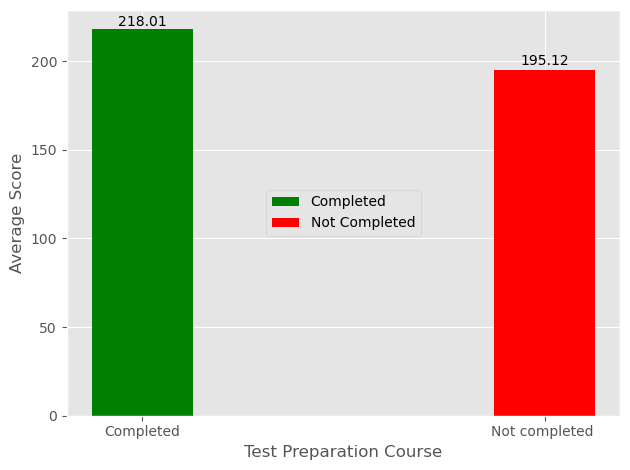

In [24]:
avg_tpc =  df.groupby('test preparation course')['Total Scores'].mean()
com_tpc= round(avg_tpc['completed'],2)
non_tpc = round(avg_tpc['none'],2)

# Visualization :
plt.bar('Completed',com_tpc,label = 'Completed',width = 0.25,color = 'green')
plt.bar('Not completed ',non_tpc,label = 'Not Completed',width = 0.25,color= 'red')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.tight_layout()
plt.legend(loc = 'center')
plt.text(0,com_tpc+2,str(com_tpc),ha = 'center')
plt.text(1,non_tpc+3,str(non_tpc),ha = 'center')
plt.show()


**Conclusion :** The average score of students who completed Test Preparation Course is better than who didn't completed the course.

## Analyze Performance Based on Parental Education Level :

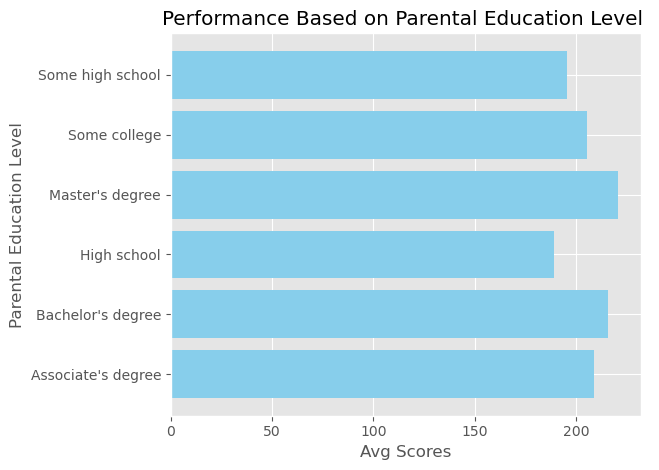

In [18]:
avg_ple = df.groupby('parental level of education')['Total Scores'].mean()
plt.barh(
    ["Associate's degree","Bachelor's degree",'High school',"Master's degree",'Some college','Some high school'],
    [avg_ple["associate's degree"],avg_ple["bachelor's degree"],avg_ple['high school'],
     avg_ple["master's degree"],avg_ple["some college"],avg_ple["some high school"]],
    color = 'skyblue'
)
plt.title('Performance Based on Parental Education Level ')
plt.xlabel('Avg Scores')
plt.tight_layout()
plt.ylabel('Parental Education Level')
plt.show()

### Comparing Scores Based on Lunch Type

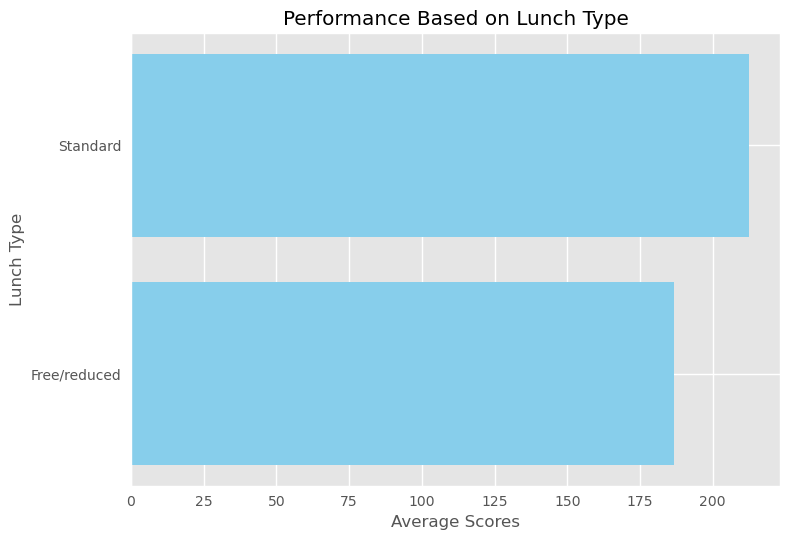

In [158]:
lunch_avg = df.groupby('lunch')['Total Scores'].mean()
plt.barh(['Free/reduced','Standard'],[lunch_avg['free/reduced'],lunch_avg['standard']],color = 'skyblue')
plt.xlabel('Average Scores')
plt.ylabel('Lunch Type')
plt.title('Performance Based on Lunch Type')
plt.tight_layout()
plt.show()

## Score Correlation

<Axes: >

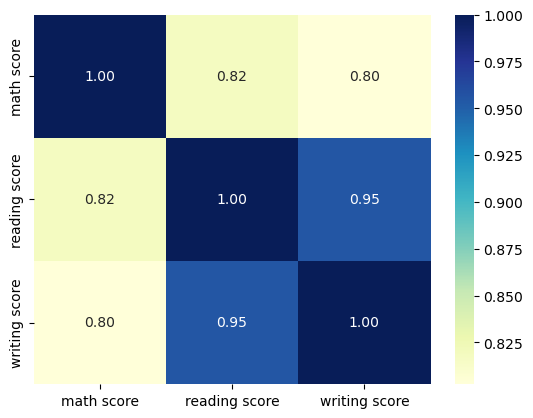

In [8]:
import seaborn as sns
pearson_corr_Matrix =df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(pearson_corr_Matrix,annot=True,cmap='YlGnBu',fmt='.2f')

## Top Performers :

In [195]:
Avg_Score = df['Total Scores'].mean()
Avg_Score # Average Score

203.312

In [14]:
total = df['Total Scores'].sort_values(ascending=False)[0:5]
top_performers = df.loc[total.index,:]
top_performers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Scores
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
